In [30]:
# csvを読み込む
import pandas as pd

input_file = '/home/eevee/social-lstm/thor-magni/tm_png/Scenario_1/val/Magni_170522_SC1B_R2.csv'
output_file = '/home/eevee/social-lstm/thor-magni/tm_png/Scenario_1/test/20241016_Magni_170522_SC1B_R2.csv'

# CSVファイルをデータフレームとして読み込む
df = pd.read_csv(input_file)

# ag_idを浮動小数点数に変換
df['ag_id'] = df['ag_id'].astype(float)

# 読み込んだデータを確認
print(df.head())  # データの最初の5行を表示


   frame_id  ag_id         x         y         z  G3D_X  G3D_Y  G3D_Z
0         1    7.0 -1613.389 -3543.957  1646.923    NaN    NaN    NaN
1         1    4.0       NaN       NaN       NaN    NaN    NaN    NaN
2         1    1.0  9088.795  -389.845  1690.647    NaN    NaN    NaN
3         1    5.0 -6488.589  2383.874  1671.752    NaN    NaN    NaN
4         1    2.0   -61.150  3350.979  1510.422    NaN    NaN    NaN


In [31]:
# ag_idでframe_idごとにソート
df = df.sort_values(['ag_id', 'frame_id'])


print(df.head())
print(df.tail())

    frame_id  ag_id          x          y         z  G3D_X  G3D_Y  G3D_Z
5          1    0.0 -3886.8360 -1188.5410  692.5010    NaN    NaN    NaN
11         2    0.0 -3886.5185 -1188.6355  692.1300    NaN    NaN    NaN
18         3    0.0 -3886.1170 -1188.7450  691.6830    NaN    NaN    NaN
28         4    0.0 -3886.0360 -1188.7200  691.6835    NaN    NaN    NaN
33         5    0.0 -3885.9915 -1188.6640  691.7495    NaN    NaN    NaN
      frame_id  ag_id          x          y          z  G3D_X  G3D_Y  G3D_Z
4777       598    7.0 -1351.6675  -497.4910  1849.2695    NaN    NaN    NaN
4784       599    7.0 -1705.4035 -1013.1660  1851.2305    NaN    NaN    NaN
4795       600    7.0 -2099.7050 -1476.8705  1826.0390    NaN    NaN    NaN
4806       601    7.0 -2584.8055 -1877.0300  1806.5125    NaN    NaN    NaN
4813       602    7.0 -3104.6940 -2210.0875  1815.7295    NaN    NaN    NaN


    frame_id  ag_id          x          y         z  G3D_X  G3D_Y  G3D_Z
5          1    0.0 -3886.8360 -1188.5410  692.5010    0.0    0.0    0.0
11         2    0.0 -3886.5185 -1188.6355  692.1300    0.0    0.0    0.0
18         3    0.0 -3886.1170 -1188.7450  691.6830    0.0    0.0    0.0
28         4    0.0 -3886.0360 -1188.7200  691.6835    0.0    0.0    0.0
33         5    0.0 -3885.9915 -1188.6640  691.7495    0.0    0.0    0.0
      frame_id  ag_id          x          y          z  G3D_X  G3D_Y  G3D_Z
4777       598    7.0 -1351.6675  -497.4910  1849.2695    0.0    0.0    0.0
4784       599    7.0 -1705.4035 -1013.1660  1851.2305    0.0    0.0    0.0
4795       600    7.0 -2099.7050 -1476.8705  1826.0390    0.0    0.0    0.0
4806       601    7.0 -2584.8055 -1877.0300  1806.5125    0.0    0.0    0.0
4813       602    7.0 -3104.6940 -2210.0875  1815.7295    0.0    0.0    0.0


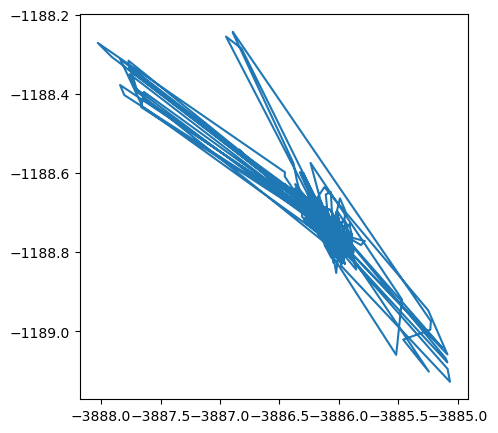

In [32]:
# `G3D_X`, `G3D_Y`, `G3D_Z`が存在しない場合は、0で埋める
df['G3D_X'] = df['G3D_X'].fillna(0)
df['G3D_Y'] = df['G3D_Y'].fillna(0)
df['G3D_Z'] = df['G3D_Z'].fillna(0)

# 補間処理を行う関数を定義
def interpolate_group(df_group):
    df_group['G3D_X'] = df_group['G3D_X'].interpolate(method='linear', limit_direction='both')
    df_group['G3D_Y'] = df_group['G3D_Y'].interpolate(method='linear', limit_direction='both')
    df_group['G3D_Z'] = df_group['G3D_Z'].interpolate(method='linear', limit_direction='both')
    # `x`, `y`, `z`の補間
    df_group['x'] = df_group['x'].interpolate(method='linear', limit_direction='both')
    df_group['y'] = df_group['y'].interpolate(method='linear', limit_direction='both')
    df_group['z'] = df_group['z'].interpolate(method='linear', limit_direction='both')
    return df_group



# ag_idごとにグループ化し、補間を適用
df_interpolated = df.groupby('ag_id').apply(interpolate_group)

df['x'] = df['x'].fillna(0)
df['y'] = df['y'].fillna(0)
df['z'] = df['z'].fillna(0)

# 補間後のデータを確認
print(df_interpolated.head())
print(df_interpolated.tail())

# 特定のag_id可視化
import matplotlib.pyplot as plt

idx = 0
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(df_interpolated[df_interpolated['ag_id'] == idx]['x'], df_interpolated[df_interpolated['ag_id'] == idx]['y'], label='ag_id=1')

# # csvとして保存
# output_file = '/home/eevee/social-lstm/thor-magni/tm_png/Scenario_1/train/20241014_Magni_120522_SC1A_R1.csv'
# df_interpolated.to_csv(output_file, index=False)
# print('Saved to', output_file)

In [33]:
# すべての行に対して、frame_idが20ごとにag_idに10を足していく
df_interpolated['modified_ag_id'] = df_interpolated['ag_id'] + ((df_interpolated['frame_id']-1) // 20) * 10

# 列の順序を指定した順に並べ替える
columns_order = ['frame_id', 'modified_ag_id', 'ag_id', 'x', 'y', 'z', 'G3D_X', 'G3D_Y', 'G3D_Z']
df_interpolated = df_interpolated[columns_order]
df_interpolated = df_interpolated.sort_values(['modified_ag_id', 'frame_id'])

print(df_interpolated.head())

# csvとして保存
df_interpolated.to_csv(output_file, index=False)
print('Saved to', output_file)

    frame_id  modified_ag_id  ag_id          x          y         z  G3D_X  \
5          1             0.0    0.0 -3886.8360 -1188.5410  692.5010    0.0   
11         2             0.0    0.0 -3886.5185 -1188.6355  692.1300    0.0   
18         3             0.0    0.0 -3886.1170 -1188.7450  691.6830    0.0   
28         4             0.0    0.0 -3886.0360 -1188.7200  691.6835    0.0   
33         5             0.0    0.0 -3885.9915 -1188.6640  691.7495    0.0   

    G3D_Y  G3D_Z  
5     0.0    0.0  
11    0.0    0.0  
18    0.0    0.0  
28    0.0    0.0  
33    0.0    0.0  
Saved to /home/eevee/social-lstm/thor-magni/tm_png/Scenario_1/test/20241016_Magni_170522_SC1B_R2.csv
